## 1. Loading and Reviewing the data

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
data = pd.read_csv(r"C:\Users\anikbakr\Desktop\My_Data\20 Projects for resume\NLP\Project-3 Restaurant review Classification\Restaurant_Reviews.tsv", sep='\t', quoting=3)

quoting{0 or csv.QUOTE_MINIMAL, 1 or csv.QUOTE_ALL, 2 or csv.QUOTE_NONNUMERIC, 3 or csv.QUOTE_NONE}, <br>default csv.QUOTE_MINIMAL<br>
Control field quoting behavior per csv.QUOTE_* constants. <br>Default is csv.QUOTE_MINIMAL (i.e., 0) which implies that only fields containing special characters are quoted<br> e.g., characters defined in quotechar, delimiter, or lineterminator.

In [133]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [134]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [135]:
data.shape

(1000, 2)

In [136]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

So there are 500 Likes and 500 Dislikes. So data is well distributed.

## 2. Cleaning Text data

In [137]:
# To remove stopwords
import nltk
import re # regular expressions

In [138]:
# We need to download stopwords first before using
nltk.download('stopwords')
from nltk.corpus import stopwords
# See the stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anikbakr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Stop words are words that are commonly used in a language but have little meaning. In English, examples of stop words include "a", "the", "and", "in", "is", "it", "he", "she", and "they". 

In [139]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [140]:
data['Review'][0]

'Wow... Loved this place.'

In [141]:
# First we check to remove regular expressions from data
review = re.sub('[^a-zA-Z]', ' ', data['Review'][0])
print(review)

Wow    Loved this place 


In [142]:
# Here we are lowring all words
review = review.lower()
print(review)

wow    loved this place 


In [143]:
# Now we can remove stopwords
# First we need to tokenized. We can split the sentences to words
review = review.split()
print(review)

['wow', 'loved', 'this', 'place']


In [144]:
# So we can create for loof to remove stop words
# We can create empty list and store which words are not stopwords
preview = []
for word in review:
    if word not in stopwords.words('english'):
        preview.append(word)

print(preview)

['wow', 'loved', 'place']


In [145]:
review = [word for word in review if word not in stopwords.words('english')]
print(preview)

['wow', 'loved', 'place']


Stemming and lemmatization are both techniques that reduce words to their base form. The main difference is that lemmatization <br>produces a meaningful word, while stemming can produce an inaccurate word. 
1. Stemming 
-   Removes common suffixes from the end of words
-   Uses algorithms to determine how many characters to remove
-   Can produce inaccurate words
-   Is quick and efficient for processing large amounts of text
-   Can increase the size of a vocabulary
2. Lemmatization
-   Analyzes the context of a sentence to produce a meaningful word 
-   Uses algorithms that consult a dictionary to understand the meaning of a word 
-   Produces a word that is an existing normalized form of the word 
-   Is more complex and computationally intensive than stemming 
<br>Examples 
-   Stemming
    --  The words "programming," "programmer," and "programs" can all be stemmed to "program".
-   Lemmatization
    --  The words "walking," "walks," and "walked" can all be lemmatized to "walk".

In [146]:
# We do stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [147]:
review = [ps.stem(word) for word in review]
review

['wow', 'love', 'place']

In [148]:
# Now we need to join the words to sentence
review = " ".join(review)
review

'wow love place'

In [149]:
# # For all steps we need to compile for single function so we can apply for each row in data
# corpus = []
# for i in range(len(data)):
#     review = data['Review'][i]
#     review = review.lower()
#     review = re.sub('[^a-zA-Z]', ' ', review)
#     review = review.split()
#     review = [word for word in review if word not in stopwords.words('english')]
#     review = [ps.stem(word) for word in review]
#     review = " ".join(review)
#     data.loc[i,'Review'] = review



In [150]:
def preprocess_review(review):
    if not isinstance(review, str):
        return ""
    review = review.lower()
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    return " ".join(review)

In [151]:
data.Review

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [152]:
data['Review']=data['Review'].apply(preprocess_review)

In [153]:
data.head()

,Review,Liked
0,wow love place,1
1,crust good,0
2,tasti textur nasti,0
3,stop late may bank holiday rick steve recommen...,1
4,select menu great price,1


## 3. Bag of Words

The bag-of-words model is a simple way to represent a document in numerical form before we can feed it into a machine learning algorithm. For any natural language processing task, we need a way to accomplish this before any further processing. Machine learning algorithms can’t operate on raw text; we need to convert the text to some sort of numerical representation. This process is also known as embedding the text.

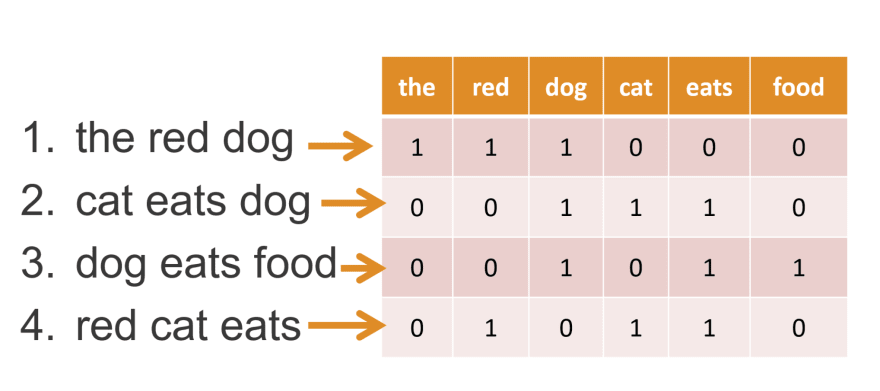

The bag-of-words model is commonly used in methods of document classification where, for example, the (frequency of) occurrence of each word is used as a feature for training a classifier. It has also been used for computer vision.

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

In [155]:
cv = CountVectorizer()

In [156]:
X = cv.fit_transform(data['Review'])

In [157]:
# Convert Sparse Matrix to Array
X_array =X.toarray() 

In [159]:
# Check the feature names which count vectorizer transformed
print("Vocabulary:", cv.vocabulary_)  # Word index mapping. Shows the mapping of words to column indices
print("Transformed Matrix\n", X_array) #  Contains the word counts for each review.

Vocabulary: {'wow': 1547, 'love': 802, 'place': 1028, 'crust': 324, 'good': 594, 'tasti': 1362, 'textur': 1374, 'nasti': 900, 'stop': 1311, 'late': 762, 'may': 834, 'bank': 92, 'holiday': 667, 'rick': 1149, 'steve': 1304, 'recommend': 1115, 'select': 1205, 'menu': 852, 'great': 608, 'price': 1062, 'get': 578, 'angri': 33, 'want': 1497, 'damn': 333, 'pho': 1016, 'honeslti': 670, 'tast': 1360, 'fresh': 553, 'potato': 1054, 'like': 785, 'rubber': 1163, 'could': 297, 'tell': 1367, 'made': 813, 'ahead': 15, 'time': 1396, 'kept': 745, 'warmer': 1499, 'fri': 554, 'touch': 1414, 'servic': 1214, 'prompt': 1074, 'would': 1545, 'go': 588, 'back': 83, 'cashier': 213, 'care': 205, 'ever': 461, 'say': 1190, 'still': 1306, 'end': 445, 'wayyy': 1507, 'overpr': 967, 'tri': 1424, 'cape': 201, 'cod': 259, 'ravoli': 1105, 'chicken': 236, 'cranberri': 310, 'mmmm': 872, 'disgust': 384, 'pretti': 1061, 'sure': 1346, 'human': 687, 'hair': 628, 'shock': 1223, 'sign': 1234, 'indic': 709, 'cash': 211, 'highli': 

In [160]:
X = X_array
y = data['Liked']

## 4. Applying Naive Bayes Algorithm

The Naive Bayes algorithm is widely used for various machine learning tasks, particularly in text classification and Natural Language Processing (NLP), because it is simple, fast, and effective in many scenarios. Here's why the Naive Bayes algorithm is a good choice:

1. Fast and Efficient:
Naive Bayes is computationally inexpensive compared to other algorithms like SVM or neural networks.
It has a linear time complexity, making it suitable for large datasets.
2. Works Well with High-Dimensional Data:
Text data often has a large number of features (words, n-grams). Naive Bayes handles high-dimensional spaces effectively.
3. Suitable for Text Classification:
It is particularly effective for text classification tasks like spam filtering, sentiment analysis, and document categorization.
This is because it works on the principle of word probabilities and their occurrence in classes (e.g., "spam" vs. "not spam").
4. Simplicity:
Naive Bayes is simple to understand and implement.
It relies on Bayes’ Theorem with an assumption of feature independence, which simplifies calculations.
5. Handles Missing Data:
Naive Bayes can handle missing features well because it calculates probabilities for each feature independently.
6. Robust in Many Cases:
Despite the "naive" assumption of independence between features, Naive Bayes performs surprisingly well in practice for many real-world applications.
7. Good for Small Datasets:
Naive Bayes is less likely to overfit and can deliver good results even with small datasets, provided the feature probabilities are well-represented.
8. Probabilistic Interpretation:
Naive Bayes provides probabilities for each class, making it easy to interpret and use in applications requiring confidence measures.
9. Applications of Naive Bayes:
* Spam detection: Classify emails as "spam" or "not spam."
* Sentiment analysis: Identify positive, negative, or neutral sentiment in reviews or tweets.
* Text categorization: Assign documents to predefined categories.
* Recommender systems: Make predictions about user preferences.
* Medical diagnosis: Predict diseases based on symptoms.
10. Limitations of Naive Bayes:
* Independence Assumption: It assumes that all features are independent, which may not hold true in real-world scenarios. However, it still performs well in practice, even if the assumption is violated.
* Zero-Frequency Problem: If a feature never appears in the training set for a given class, its probability is considered zero, which can lead to issues. This is handled using techniques like Laplace smoothing.
* Not Ideal for Continuous Data: Naive Bayes is better suited for categorical data. For continuous data, assumptions like Gaussian distributions need to be made.
11. Why Choose Naive Bayes?
* If you are working on a text classification task (like your dataset with "Reviews" and "Liked"), Naive Bayes is a strong candidate because:

* It’s fast and easy to implement.
* It performs well with sparse data (like the bag-of-words or TF-IDF vectors).
* It provides a baseline for comparison with more complex algorithms.


In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [162]:
X_train.shape, X_test.shape

((800, 1565), (200, 1565))

In [163]:
y_train.shape, y_test.shape

((800,), (200,))

## We can apply first MultinominalNB

In [167]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [168]:
classifier_GNB = GaussianNB()
classifier_MNB = MultinomialNB()

In [174]:
# Train a Naive Bayes classifier
classifier_GNB.fit(X_train, y_train)
classifier_MNB.fit(X_train, y_train)

MultinomialNB()

In [175]:
y_pred_GNB =classifier_GNB.predict(X_test)
y_pred_MNB =classifier_MNB.predict(X_test)

In [179]:
# Evaluate the model
accuracy = classifier_GNB.score(X_test, y_test)
print(f"Model Accuracy using Gussian Naive Bias: {accuracy:.2f}")

Model Accuracy using Gussian Naive Bias: 0.67


In [181]:
# Evaluate the model
accuracy = classifier_MNB.score(X_test, y_test)
print(f"Model Accuracy using MultinomialNB Naive Bias: {accuracy:.2f}")

Model Accuracy using MultinomialNB Naive Bias: 0.80


## Saving the model and Vectorizer

In [184]:
import joblib
# Save the trained model
joblib.dump(classifier_MNB, "sentiment_model.pkl")

# Save the CountVectorizer instance
joblib.dump(cv, "vectorizer.pkl")

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
